# Phase 1 Project

# Business Understanding

Esteemed Microsoft Board of Directors, it is an honor to be addressing you today with regards to the opportunity to delve into the film industry. As a data-driven individual, I have analyzed the potential profits and identified simple yet achievable goals for this endeavor. I am confident that my presentation will provide valuable insights and a clear recommendation on how to proceed.

Having thoroughly researched and analyzed the film industry, I am aware of the various trends and challenges that come with this field. I understand the importance of making well-informed and strategic decisions that align with the goals and values of our company. My recommendation will be based on a thorough evaluation of market trends, consumer preferences, and the competitive landscape, ensuring that we make a wise investment and maximize our potential for success. I am confident that with my understanding of the industry and my ability to make data-driven decisions, I can provide valuable insights and recommendations that will benefit Microsoft and help us achieve our goals.

## Business Problem

The film industry is constantly evolving, and it is crucial for us to have a thorough understanding of recent developments in order to make a well-informed decision. By analyzing the IMDb database, which contains over 70,000 films made in the past 12 years, we can gain valuable insights into consumer preferences and market trends. By looking at the films with the highest ratings and the most votes, we can identify the genres and production elements that have resonated with audiences and use this information to inform our strategy. This analysis will be a crucial step in ensuring that we make a wise investment and achieve the most profitability possible.

# Data Understanding

In order to fully understand the data, it is important to consider not only the apparent winners but also potential drawbacks and limitations. By examining the top-rated and most voted films in the IMDb database, we may identify a clear market trend. However, it is also important to acknowledge any limitations or potential drawbacks to this strategy. For example, relying solely on the most popular films may result in a narrow focus and limited creativity.

However, this information can still be used to inform a secondary production set that balances profitability with creative expression. By combining the insights gained from analyzing market trends with our own unique vision and mission, we can create a strategy that sets us apart from the competition and allows us to achieve both commercial success and artistic fulfillment.

# Exploratory Data Analysis

In order to look at the data, I am going to import some Python libraries. This is a technical step, as will be every time I present code here. This is what manages our data and generates our graphs. 

In [1]:
# Bringing in the libraries I will use for this project
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import random
import matplotlib.pyplot as plt
import seaborn as sns

Having imported the Python libraries I will use for the technical presentation, I will now access the IMDb database. I do this with SQLite. Please bare with me, we will be see the data in just a few moments.

In [2]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')
cursor = conn.cursor()

In [3]:
# Let's see that the data is there
! dir Data

 Volume in drive C has no label.
 Volume Serial Number is 5CDE-0ED8

 Directory of C:\Users\us\Documents\DT Flatiron Flex Course\phase_1\Microsoft_Film_Proposal\Data

01/26/2023  01:34 PM    <DIR>          .
01/26/2023  01:34 PM    <DIR>          ..
01/09/2023  11:47 AM            53,544 bom.movie_gross.csv.gz
12/20/2021  04:31 PM       169,443,328 im.db
01/09/2023  11:47 AM        67,149,708 im.db.zip
01/09/2023  11:47 AM           498,202 rt.movie_info.tsv.gz
01/09/2023  11:47 AM         3,402,194 rt.reviews.tsv.gz
01/09/2023  11:47 AM           827,840 tmdb.movies.csv.gz
01/09/2023  11:47 AM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  326,036,447,232 bytes free


In [4]:
sql_tables = """
select name
from sqlite_master
where type='table'
"""

I will now show you the tables this database offers.  From here we will be able to produce the relevant information and analyze it:

In [5]:
pd.read_sql(sql_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [6]:
df = pd.read_sql(sql_tables, conn)
df.head()


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


Let's now see some of the movies by their ID, title, year of production, runtime length and genre.  

In [7]:
sql = "SELECT * FROM movie_basics"
df = pd.read_sql(sql, conn)
df.head(25)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


Now that we have our movie listings, let's take a brief look at the ratings:

We can now see the average rating (averagerating), and the number of votes (numvotes).  Being this a very large listing, we are only looking at a sample of five.

Certainly, our analysis will look at a larger sample, selecting the best-scoring items in our data.  

First, let us put together the rating table with that of movie basics, which has the complementary information necessary for the purposes of our presentation. We will limit our presentation to the top 25 best scoring movies.

In [8]:
# Only the top 25
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print(row)


('tt10176328', 'Exteriores: Mulheres Brasileiras na Diplomacia', 'Exteriores: Mulheres Brasileiras na Diplomacia', 2018, 52.0, 'Documentary', 'tt10176328', 10.0, 5)
('tt10378660', 'The Dark Knight: The Ballad of the N Word', 'The Dark Knight: The Ballad of the N Word', 2018, 129.0, 'Comedy,Drama', 'tt10378660', 10.0, 5)
('tt1770682', 'Freeing Bernie Baran', 'Freeing Bernie Baran', 2010, 100.0, 'Crime,Documentary', 'tt1770682', 10.0, 5)
('tt2632430', 'Hercule contre Hermès', 'Hercule contre Hermès', 2012, 72.0, 'Documentary', 'tt2632430', 10.0, 5)
('tt4109192', 'I Was Born Yesterday!', 'I Was Born Yesterday!', 2015, 31.0, 'Documentary', 'tt4109192', 10.0, 6)
('tt4944240', 'Dog Days in the Heartland', 'Dog Days in the Heartland', 2017, None, 'Drama', 'tt4944240', 10.0, 5)
('tt4960818', 'Revolution Food', 'Revolution Food', 2015, 70.0, 'Documentary', 'tt4960818', 10.0, 8)
('tt5089804', 'Fly High: Story of the Disc Dog', 'Fly High: Story of the Disc Dog', 2019, 65.0, 'Documentary', 'tt5089

The data above is not easy to read.  Bare with me. I will not present it in tabular form.  It will look more like a spreadsheet.

In [9]:
# Let's make this into a tabular presentation
import pandas as pd

query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY averagerating DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']
df

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,tt10176328,10.0,5
1,tt10378660,The Dark Knight: The Ballad of the N Word,2018,129.0,"Comedy,Drama",tt10378660,10.0,5
2,tt1770682,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",tt1770682,10.0,5
3,tt2632430,Hercule contre Hermès,2012,72.0,Documentary,tt2632430,10.0,5
4,tt4109192,I Was Born Yesterday!,2015,31.0,Documentary,tt4109192,10.0,6
5,tt4944240,Dog Days in the Heartland,2017,NaN,Drama,tt4944240,10.0,5
6,tt4960818,Revolution Food,2015,70.0,Documentary,tt4960818,10.0,8
7,tt5089804,Fly High: Story of the Disc Dog,2019,65.0,Documentary,tt5089804,10.0,7
8,tt5344358,All Around Us,2019,NaN,Documentary,tt5344358,10.0,6
9,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,tt5390098,10.0,5


Alrigth! We now have a sample of the 25 best rated film productions, world-wide. 

Rating Comparision Chart


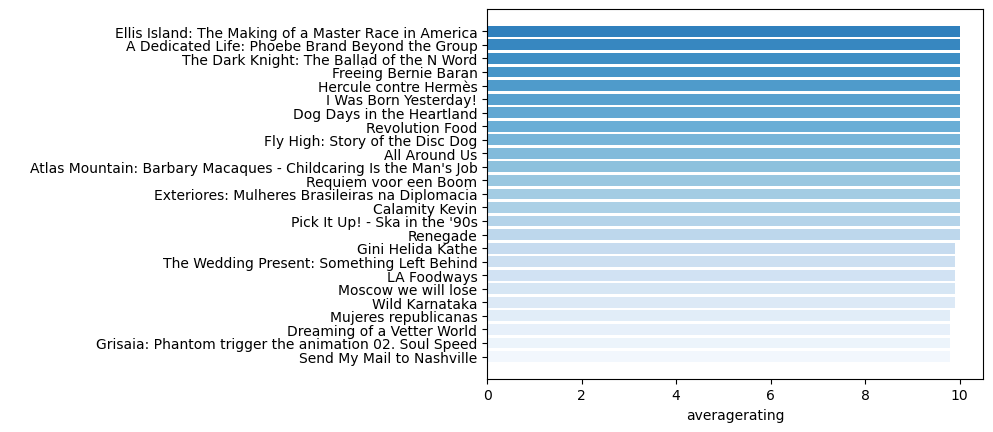

In [10]:
# Sort dataframe by Average Rating
df = df.sort_values(by='averagerating')

# Create a list of random colors for each bar
colors = [f'C{i}' for i in range(len(df))]
random.shuffle(colors)

print("Rating Comparision Chart")

# Create horizontal bar graph
colors = sns.color_palette("Blues", 35)
plt.barh(df['original_title'], df['averagerating'], color=colors)
plt.ylabel(' ')
plt.xlabel('averagerating')
plt.show()


Let's see what these data tells us.

What genre are these movies?

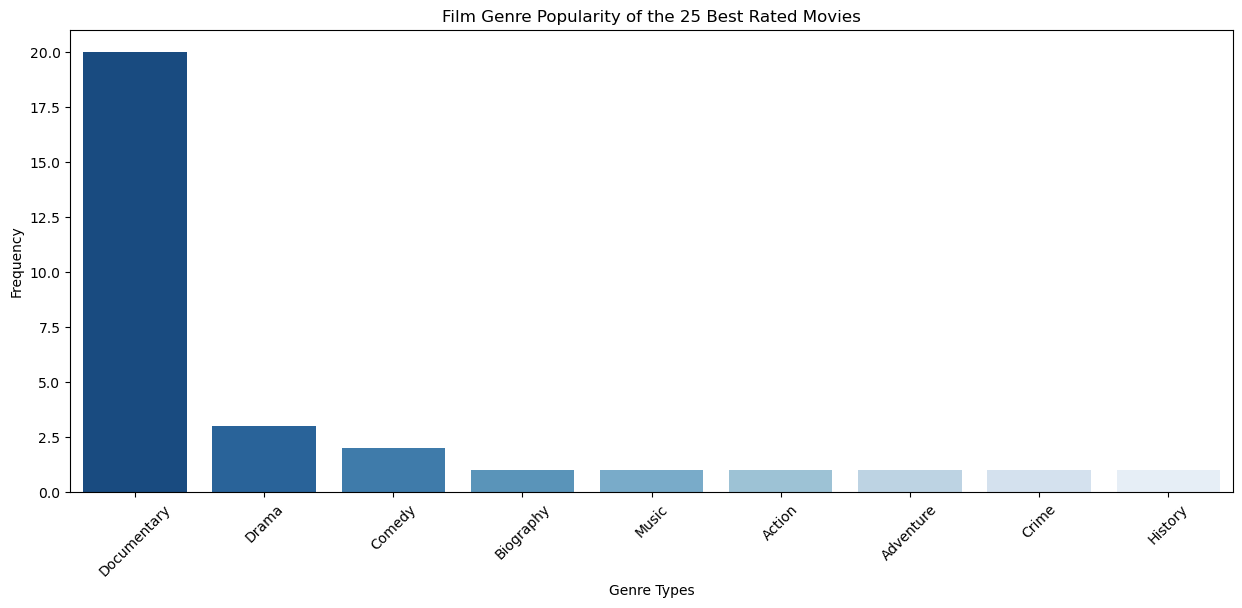

In [11]:
# Setting the height and width of the graph
plt.figure(figsize=(15,6))

# Splitting the genres column into separate genres and counting the frequency of each genre
genres = df["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count))

# Plotting the bar graph
sns.barplot(x=genres_count.index, y=genres_count.values, palette=palette)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Best Rated Movies")
plt.xticks(rotation=45)
plt.show()


The graph above shows us that documentaries are, beyond the shadow of a doubt, far better rated than other genre of film.  Another question I would like to ask the the length of each film.

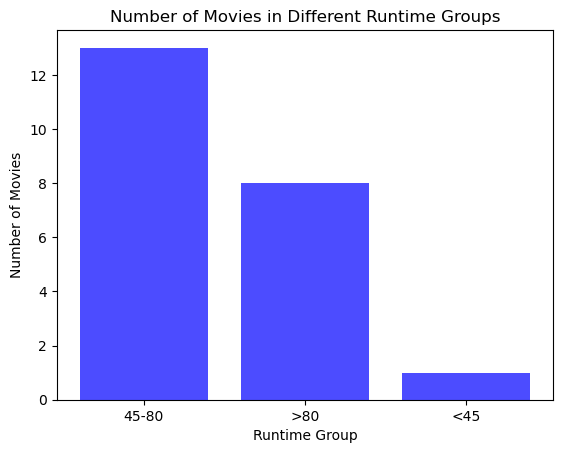

In [12]:
# Now let's look at the length of each film vs its rating:

import matplotlib.pyplot as plt

# Dividing the runtime into two groups: between 45 and 80 minutes, and outside of that interval
bins = [0, 45, 80, df['runtime_minutes'].max()]
labels = ['<45', '45-80', '>80']
df['runtime_group'] = pd.cut(df['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df['runtime_group'].value_counts()

# Creating the bar plot
plt.bar(group_counts.index, group_counts.values, color='blue', alpha=0.7)
plt.xlabel("Runtime Group")
plt.ylabel("Number of Movies")
plt.title("Number of Movies in Different Runtime Groups")
plt.show()


What I have shown you so far suggests that making documentary films 45 to 80 minutes in length would be my recommentation.  Well, it is...

However, this is not the best option for a profitable investment. The reason for this is that, albeit being highly-rated, these productions count with very few votes.  Meaning, that only a few selected viewers are voting for these films.  Yes, this selected public likes the genre very much.  

This is what we call a "false positive". A single metric measure appears to answer our question, but it does not. 

For now, let's keep that information on the back burner.  

Let's now ask what film genre has most votes.  This will show the much larger public that watches, consumes, and votes for movies.

In [13]:
query = """
SELECT * 
FROM movie_basics INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY numvotes DESC
LIMIT 25
"""
cursor.execute(query)
result = cursor.fetchall()

df = pd.DataFrame(result)
df = df.drop(df.columns[1], axis=1)
df.columns = ['movie_id', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes']

df_secondary = df.copy()
df_secondary

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


Now we have a much different picture of these succesfull motion pictures - pun intended. As common sense would dictate, the masses aren't as culture-driven. They mostly watch something other than documentaries. Let's see what genre are they most prompt to consume:

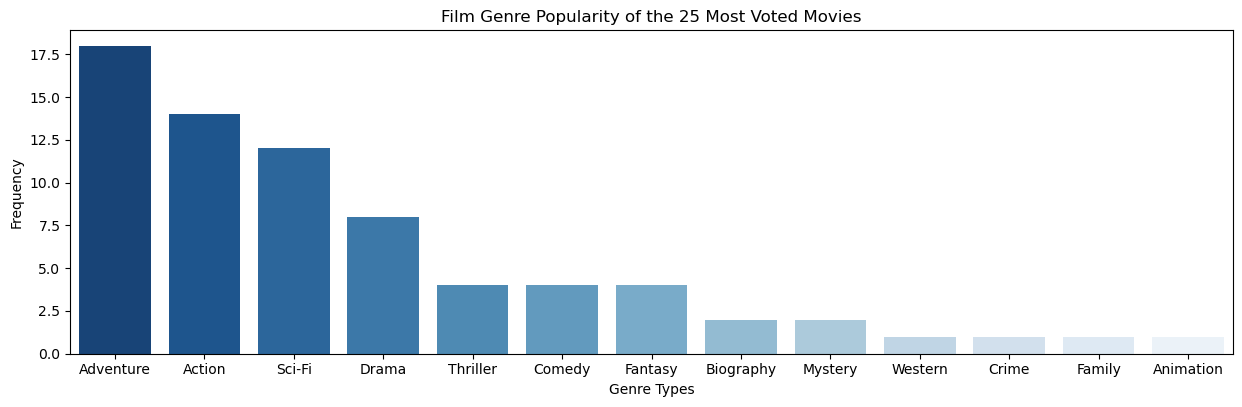

In [14]:
# Setting the height and width of the graph
plt.figure(figsize=(15,4.2))

# Splitting the genres column into separate genres and counting the frequency of each genre
genres = df_secondary["genres"].str.split(",").explode()
genres_count = genres.value_counts()

# Setting the color palette to shades of blue, from dark to light
palette = sns.color_palette("Blues_r", len(genres_count))

# Plotting the bar graph
sns.barplot(x=genres_count.index, y=genres_count.values, palette=palette)
plt.xlabel("Genre Types")
plt.ylabel("Frequency")
plt.title("Film Genre Popularity of the 25 Most Voted Movies")
plt.xticks()
plt.show()

Even though many productions combine two or three types of genre, the winners are clearly Adventure, Action and Sci-Fi films. These are by far the most popular, and certainly the obviously best choice of a profitable investment in the film industry in our generation.  

How about the length?  Keep people entertained for a couple hours!

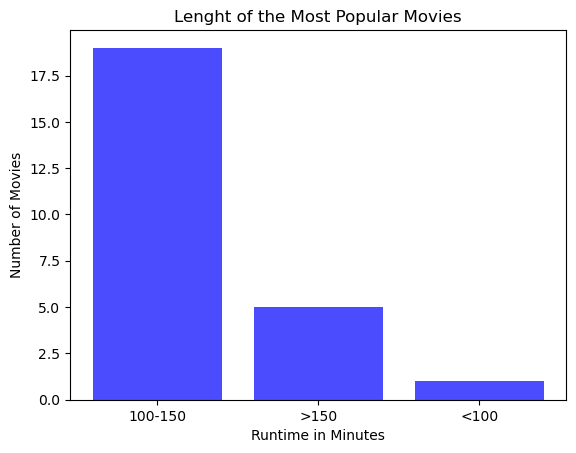

In [15]:
# Lets, again, look at the length of the films

# Now let's look at the length of each film vs its rating:

# Dividing the runtime into two groups: between 45 and 80 minutes, and outside of that interval
bins = [0, 100, 150, df['runtime_minutes'].max()]
labels = ['<100', '100-150', '>150']
df_secondary['runtime_group'] = pd.cut(df_secondary['runtime_minutes'], bins=bins, labels=labels)

# Counting the number of movies in each runtime group
group_counts = df_secondary['runtime_group'].value_counts()

# Creating the bar plot
plt.bar(group_counts.index, group_counts.values, color='blue', alpha=0.7)
plt.xlabel("Runtime in Minutes")
plt.ylabel("Number of Movies")
plt.title("Lenght of the Most Popular Movies")
plt.show()


Let's ask now the most important question your investors will want to know. The bottom line. What type of movies make the most profit? This will be a very important measure to compare and test my assumption.

So lets go for the measures in the right tables:

In [16]:
import pandas as pd
df_3 = pd.read_csv('Data/bom.movie_gross.csv.gz')

df_3.head(25)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


For the sake of clarity, let's see a total gross profit by adding international and domestic gross profit.

In [17]:

# Convert domestic_gross and foreign_gross columns to numeric format
df_3['domestic_gross'] = pd.to_numeric(df_3['domestic_gross'], errors='coerce')
df_3['foreign_gross'] = pd.to_numeric(df_3['foreign_gross'], errors='coerce')

# Add total_gross column
df_3['total_gross'] = df_3['domestic_gross'] + df_3['foreign_gross']

# Format total_gross column as currency
df_3['total_gross'] = df_3['total_gross'].apply(lambda x: "${:,.2f}".format(x))

# Make sure the film with the greatest total gross revenue appears on top
df_3 = df_3.sort_values(by='total_gross', ascending=False).head(25)


df.head(25)


,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


Now we are talking! Let us now take a look in a graph: what films make the biggest buck 💵💶.

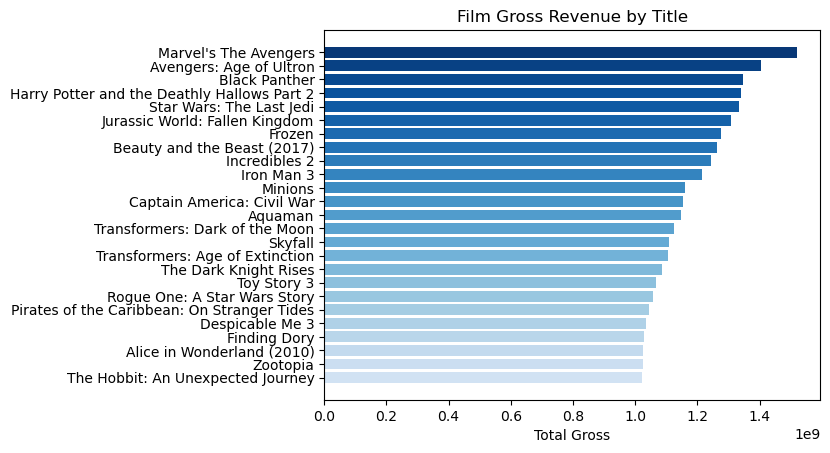

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reading from here
df_4 = pd.read_csv('Data/bom.movie_gross.csv.gz')

# Convert domestic_gross and foreign_gross columns to numeric format
df_4['domestic_gross'] = pd.to_numeric(df_4['domestic_gross'], errors='coerce')
df_4['foreign_gross'] = pd.to_numeric(df_4['foreign_gross'], errors='coerce')

# Add total_gross column
df_4['total_gross'] = df_4['domestic_gross'] + df_4['foreign_gross']

# Plot the data
colors = sns.color_palette("Blues", 30)[::-1]
df_4 = df_4.sort_values(by='total_gross', ascending=False).head(25)
plt.barh(df_4['title'], df_4['total_gross'], color=colors)
plt.xlabel('Total Gross')
plt.title('Film Gross Revenue by Title')
plt.gca().invert_yaxis()
plt.show()


Of course, our ABCs in basic business force us to ask for the cost. We can't measure the real business success if costs outweight revenue. Se we will now look at movie budget. 

In [19]:
import pandas as pd
df_5 = pd.read_csv('Data/tn.movie_budgets.csv.gz')

df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


Bear with me, please. Now we're talking business. This table alone may provide us with a concrete answer. 
Seems to me that the "Worldwide Gross" includes the Domestic Gross" revenue. If we substract that to Production Budget, we will have an actual revenue figure. Let's do that!

First, some technical preparations that will allow us to get to the bottom of this. I will play with the type of data our financial information columns in the classification of Python programming. We will check the type of data, convert them into the type we can edit, remove the dollar signs and commas

In [20]:
# Checking the column types before doing any math here:
df_5.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [21]:
# Transforming the type to string in order to eliminate dollar signs and commas - a step towards making the math
df_5['domestic_gross'] = df_5['domestic_gross'].astype(str)
df_5['production_budget'] = df_5['production_budget'].astype(str)
df_5['worldwide_gross'] = df_5['worldwide_gross'].astype(str)

In [22]:
# Changing types to do math, but first eliminate the fancy dollar signs and commas. 
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace("$", "")
df_5['domestic_gross'] = df_5['domestic_gross'].str.replace(",", "")
df_5['domestic_gross'] = df_5['domestic_gross'].astype(float)

df_5['production_budget'] = df_5['production_budget'].str.replace("$", "")
df_5['production_budget'] = df_5['production_budget'].str.replace(",", "")
df_5['production_budget'] = df_5['production_budget'].astype(float)


df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace("$", "")
df_5['worldwide_gross'] = df_5['worldwide_gross'].str.replace(",", "")
df_5['worldwide_gross'] = df_5['worldwide_gross'].astype(float)

# This gives us a warning, but still works

C:\Users\us\AppData\Local\Temp\ipykernel_13776\404604489.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['domestic_gross'] = df_5['domestic_gross'].str.replace("$", "")
C:\Users\us\AppData\Local\Temp\ipykernel_13776\404604489.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['production_budget'] = df_5['production_budget'].str.replace("$", "")
C:\Users\us\AppData\Local\Temp\ipykernel_13776\404604489.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_5['worldwide_gross'] = df_5['worldwide_gross'].str.

In [23]:
# Checking the column types again to see if we succesfully changed them:
df_5.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [24]:
# Now let's look at our modifed table
df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08


In [25]:
# Now let's subtract Production Budget from Worldwide Gross - 
# assuming that the latter already includes the Domestic Gross amount
# we will call that "Actual Revenue"

df_5['actual_revenue'] = df_5['worldwide_gross'] - df_5['production_budget']

#and organize our dataframe according to this new column
df_5.sort_values(by='actual_revenue', ascending=False, inplace=True)

df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09


Worth the effort! We have concrete figures now on the actual winning money-making films in the industry.  Let's graph our results!

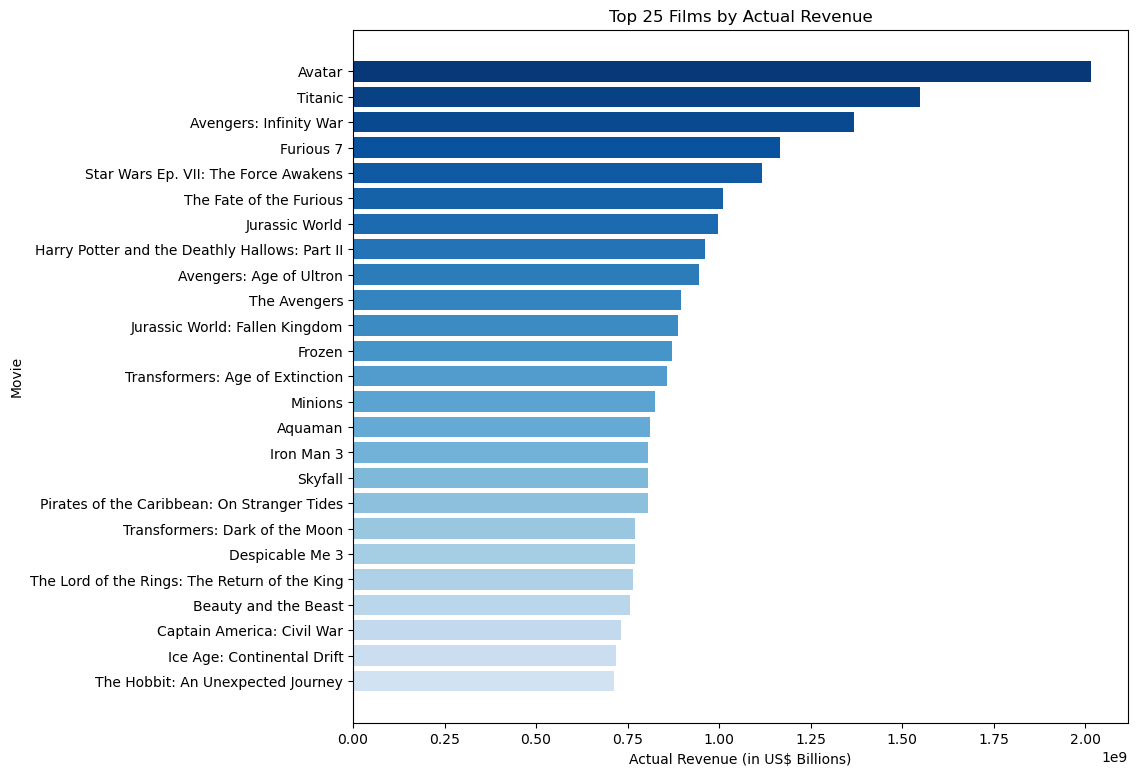

In [67]:
# Our Actual Revenue calculation
df_5['actual_revenue'] = df_5['worldwide_gross'] - df_5['domestic_gross']
df_5 = df_5.nlargest(25, 'actual_revenue')

# Plotting the data

# Color palette in shades of blue, darker first
colors = sns.color_palette("Blues", 30)[::-1]

# Graph Size
plt.figure(figsize=(10, 9))

# Graph Axis, enter colors in place, lable axis
plt.barh(df_5['movie'], df_5['actual_revenue'], color=colors)
plt.xlabel('Actual Revenue (in US$ Billions)')
plt.ylabel('Movie')

# Place title, place biggest actual revenue film first
plt.title('Top 25 Films by Actual Revenue')
plt.gca().invert_yaxis()

# Render graph
plt.show()

In [39]:
df_5.head(25)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,1.548844e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.165716e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09
22,23,"Apr 14, 2017",The Fate of the Furious,250000000.0,225764765.0,1.234846e+09,1.009082e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,9.965842e+08
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.605000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,8.946564e+08


In [51]:
df.head(35)

,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,tt1853728,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
5,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358
6,tt1130884,Shutter Island,2010,138.0,"Mystery,Thriller",tt1130884,8.1,1005960
7,tt2015381,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",tt2015381,8.1,948394
8,tt1431045,Deadpool,2016,108.0,"Action,Adventure,Comedy",tt1431045,8.0,820847
9,tt1392170,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",tt1392170,7.2,795227


Now we may beging asking the key questions.  We have the information in the sources above.  What genre are these high net-profit movies?

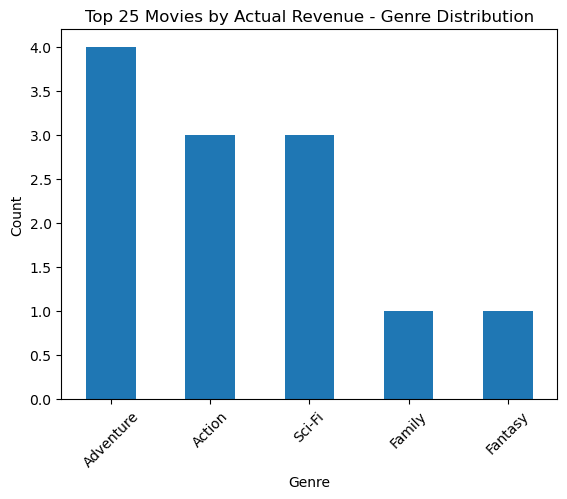

In [29]:

# merge the two dataframes on the movie column in df_5 and original_title column in df
df_merged = pd.merge(df_5.sort_values("actual_revenue", ascending=False).head(25), df, left_on="movie", right_on="original_title")

# count the number of occurrences of each genre in the merged dataframe
genre_counts = df_merged["genres"].str.split(",").explode().value_counts()

# plot the genre count in a bar graph
genre_counts.plot(kind="bar", xlabel="Genre", ylabel="Count", title="Top 25 Movies by Actual Revenue - Genre Distribution")
plt.xticks(rotation=45);


<img src="Data/Monkey_Wrench.jpg" width="150" height="100" style="float:left; margin-right:15px;"/>

Oh-oh, something seems wrong!

There's a monkey wrench in the dataframe.

We have another false positive.

The numbers don't add up.

Let's look at the df_merged dataframe we used for the analysis above:


In [58]:
# I think something is wrong, there are only 4 films in our merged dataframe. 
df_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,actual_revenue,movie_id,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",tt2395427,7.3,665594
2,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,8.946564e+08,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
3,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,7.140000e+08,tt0903624,The Hobbit: An Unexpected Journey,2012,169.0,"Adventure,Family,Fantasy",tt0903624,7.9,719629


May be only the Avengers' movies and the 2012 Hobbit are on the join space of both dataframes' sets. If so, let's look at where else this information may be available.

Let's do something unorthodox here. I don't mean the Netflix series. I mean let's manually assign the genres to our top 25 net money-making films. 

In [63]:
# Create a dictionary to store the movie names and their genres
movies = {
    'Avatar': 'Science Fiction',
    'Titanic': 'Romance, Drama',
    'Avengers: Infinity War': 'Superhero, Action, Adventure',
    'Star Wars Ep. VII: The Force Awakens': 'Science Fiction, Action, Adventure',
    'Jurassic World': 'Science Fiction, Adventure, Action',
    'Furious 7': 'Action, Crime, Thriller',
    'The Avengers': 'Superhero, Action, Adventure',
    'Harry Potter and the Deathly Hallows: Part II': 'Fantasy, Adventure, Drama',
    'Black Panther': 'Superhero, Action, Adventure',
    'Jurassic World: Fallen Kingdom': 'Science Fiction, Adventure, Action',
    'Frozen': 'Animation, Family, Fantasy, Musical',
    'Beauty and the Beast': 'Fantasy, Musical, Romance',
    'Minions': 'Animation, Comedy, Family',
    'Avengers: Age of Ultron': 'Superhero, Action, Adventure',
    'The Lord of the Rings: The Return of the King': 'Fantasy, Adventure',
    'Incredibles 2': 'Animation, Action, Adventure, Family',
    'Iron Man 3': 'Superhero, Action, Adventure',
    'Star Wars Ep. VIII: The Last Jedi': 'Science Fiction, Action, Adventure',
    'Aquaman': 'Science Fiction, Action, Adventure',
    'The Fate of the Furious': 'Action, Crime, Thriller',
    'Jurassic Park': 'Science Fiction, Adventure, Thriller',
    'Despicable Me 3': 'Animation, Comedy, Family',
    'Captain Marvel': 'Superhero, Action, Adventure',
    'Transformers: Dark of the Moon': 'Science Fiction, Action, Adventure',
    'Star Wars Ep. I: The Phantom Menace': 'Science Fiction, Action, Adventure',
    'Skyfall': 'Action, Adventure, Thriller',
    'Pirates of the Caribbean: On Stranger Tides': 'Action, Adventure, Fantasy',
    'Transformers: Age of Extinction': 'Science Fiction, Action, Adventure',
    'Captain America: Civil War': 'Superhero, Action, Adventure',
    'Ice Age: Continental Drift': 'Animation, Adventure, Family',
    'The Hobbit: An Unexpected Journey': 'Fantasy, Adventure'
}

# Convert the dictionary to a Pandas dataframe
df_9 = pd.DataFrame(list(movies.items()), columns=['Movie', 'Genre'])


In [64]:
# Split the genres into separate rows
df_9 = df_9.assign(Genre=df_9['Genre'].str.split(', ')).explode('Genre')

# Get the frequency of each genre
genre_counts = df_9['Genre'].value_counts()

In [65]:
# Print dataframe
df_9

,Movie,Genre
0,Avatar,Science Fiction
1,Titanic,Romance
1,Titanic,Drama
2,Avengers: Infinity War,Superhero
2,Avengers: Infinity War,Action
...,...,...
29,Ice Age: Continental Drift,Animation
29,Ice Age: Continental Drift,Adventure
29,Ice Age: Continental Drift,Family
30,The Hobbit: An Unexpected Journey,Fantasy


That gives us a break down of film and genre. When a film belongs to more than one genre category, we repeat the movie title in order to count the genre separtedly. This will make our graph easier.  I said I'd do it in an unrothodox manner. Bottom line: it works.

Now we will graph it.

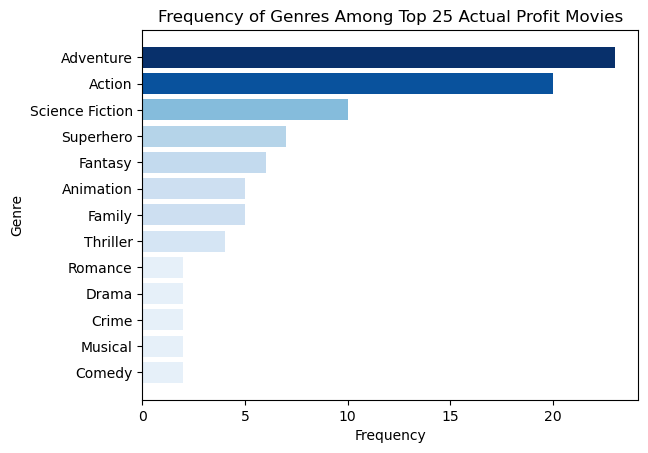

In [66]:
# Use different shades of blue for the bar colors
colors = plt.cm.Blues(genre_counts.values/genre_counts.values.max())
for i, color in enumerate(colors):
    plt.barh(genre_counts.index[i], genre_counts.values[i], color=color)
    
# Label our x and y axis and give a title to the graph
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Frequency of Genres Among Top 25 Actual Profit Movies')

# Invert the y-axis so the largest value is on top
plt.gca().invert_yaxis()

# Measures for the x axis, and let's produce the graph
plt.xticks()
plt.show()

Now we see as clear as daylight that Adventure and Action movies are the winning bet. Sci-Fi comes in an honorable third place. Perhaps a combo of the three would be the best for good returns. 

I would even venture to say that a movie like 'Titanic', classified as a Romance and a Drama, actually made the big bucks because of the Adventure element in it. But that is my opinion.  The Data shows that, clearly, Adventure and Action films present the best ROI.

This independent research data only corroborates what we already saw above.

What else? Of course, let's look at the running time.

In [68]:
average_runtime = df_merged['runtime_minutes'].mean()
print("Average runtime: ", average_runtime)


Average runtime:  150.5


In the data frame from the provided data, the average running time of 150 and a half minutes. Two and a half hours.

To do: Out of the top 25 Actual Revenue films, offer a bar graph with run time sections:
- Less or Equal to 90 minutes
- 91 to 120 minutes
- 121 to 150 minutes
- 151 to 180 minutes
- More than 180 minutes

# Conclusion

I understand the importance of presenting a well-rounded perspective to the Microsoft Board of Directors and ultimately, to Mr. Gates. As a visionary leader and philanthropist, he not only cares about the financial success of our company, but also his legacy and how he can benefit humanity through our endeavors.

With that in mind, I strongly recommend that we focus on producing Adventure, Action, and Sci-Fi movies. These genres have proven to be highly profitable in the film industry and offer a high potential for commercial success. By competing with the major players in Hollywood, we can establish Microsoft as a significant player in the film industry and achieve the financial goals we have set.

However, my early recommendation is that we not only focus on profitability, but also consider how we can use this opportunity to make a positive impact on society and align with Mr. Gates' mission of benefiting humanity. By exploring themes and storylines that raise awareness and drive positive change, we can create films that are both financially successful and leave a lasting impact on the world.

# Recomentations

Let Microsoft produce movies averaging two hours in length on the genres of Adventure, Action, and Sci-Fi.  May be a combination of two or all three genres. Once this show profitability, let Microsoft also produce shorter documentary films, 45 to 80 minutes in length.

# Next Steps